In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Load causal algorithms from the py-causal library and Run CCD

In [4]:
from pycausal import search as s
ccd = s.ccd(df,dataType = 0, depth = -1, alpha = 0.05)

#### CCD Continuous' Result's Nodes

In [5]:
ccd.getNodes()

['TangibilityCondition',
 'AmountDonated',
 'Sympathy',
 'Imaginability',
 'Impact']

#### CCD Continuous' Result's Edges

In [6]:
ccd.getEdges()

['Impact o-o Sympathy',
 'TangibilityCondition --> Sympathy',
 'Impact o-o Imaginability',
 'AmountDonated --> Impact']

#### Plot The Result's Graph

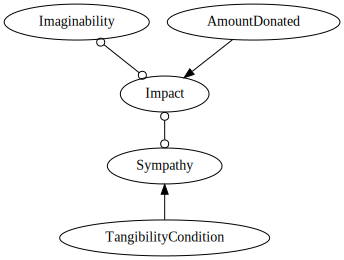

In [7]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(ccd.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [8]:
pc.stop_vm()